# 1.2 遥感图像分类实例

下面以DC高分辨率数据来演示使用sklearn中随机森林的分类器进行分类的过程。

Washington DC Mall 高分辨率高光谱数据介绍与下载:

https://engineering.purdue.edu/~biehl/MultiSpec/hyperspectral.html

http://cobweb.ecn.purdue.edu/~biehl/Hyperspectral_Project.zip

Label 下载

https://github.com/yangnaisen/PRoRS_docs/blob/master/source/Introduction/1.Introduction/DataSet/SampleLabel.mat


## 1.2.1 读取数据

配置图片输出格式：

In [1]:
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.simplefilter("ignore")

读取影像数据，转换为输入样本矩阵：

In [2]:
from skimage.io import imread
img = imread('DataSet/dc.tif')
num_rows = img.shape[0] 
num_colomns = img.shape[1]
num_bands = img.shape[2]
X = img.reshape(num_rows*num_colomns,num_bands)

查看图像的波段数量和像素数量：

In [3]:
X.shape

(392960, 191)

读取样本的标记信息：

In [4]:
from scipy.io import loadmat
Y = loadmat('DataSet/SampleLabel.mat')['S']
Y = Y.reshape(num_rows*num_colomns)

选取7个类别的数据：

In [5]:
import numpy as np
y_index=np.where(Y > 0)[0];
selected_y = Y[y_index]
selected_X = X[y_index]

## 1.2.2 数据可视化

选取其中的三个波段，显示图像：

In [6]:
slice_img = np.concatenate([img[:,:,60:61],img[:,:,27:28],
                            img[:,:,17:18]], axis=2)

(<Figure size 988.8x604.8 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x10f6bc5c0>)

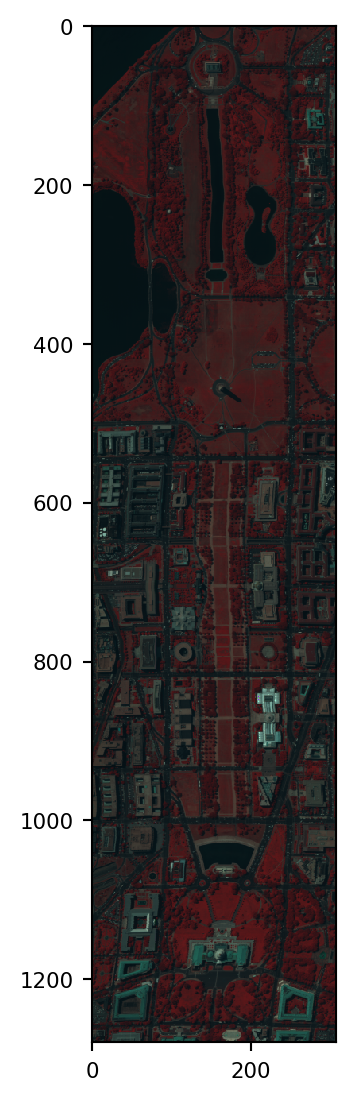

In [7]:
from skimage.external.tifffile import imshow
import matplotlib.pyplot as plt
%matplotlib inline

imshow(slice_img)

选择其中的两个红、绿波段进行可视化：

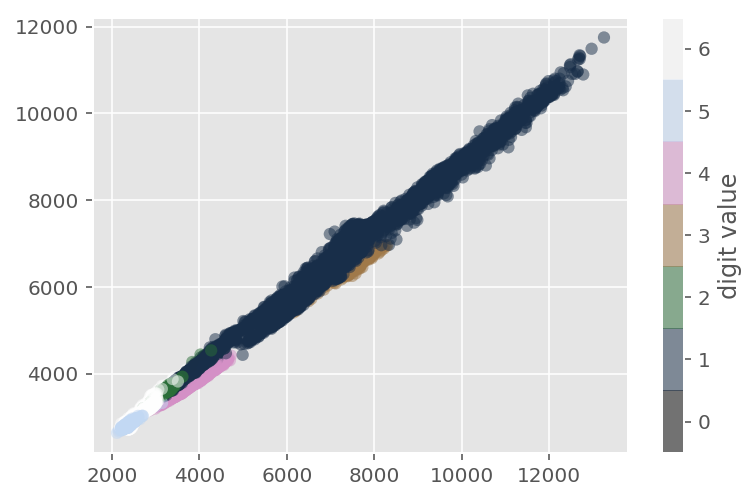

In [8]:
plt.style.use('ggplot')
plt.scatter(selected_X[:, 27], selected_X[:, 17], lw=0.1,
            c=selected_y, 
            cmap=plt.cm.get_cmap('cubehelix', 7),alpha=0.5)
plt.colorbar(ticks=range(7), label='digit value')
plt.clim(-0.5, 6.5)

## 1.2.3 训练分类器

划分成训练集和验证集：

In [9]:
from sklearn.model_selection import StratifiedKFold,train_test_split

X_train,X_valid,y_train,y_valid = train_test_split (selected_X,
                                                  selected_y,
                                                  test_size = 0.4, 
                                                  random_state=2,
                                                  stratify = selected_y)

In [10]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=40,max_depth=  7,criterion='gini')
model.fit(X_train,y_train);

随机森林的训练精度：

In [11]:
model.score(X_train, y_train)

0.9993810604497627

验证精度：

In [12]:
model.score(X_valid, y_valid)

0.9965965346534653

## 1.2.4 精度评价：

对混淆矩阵进行可视化：

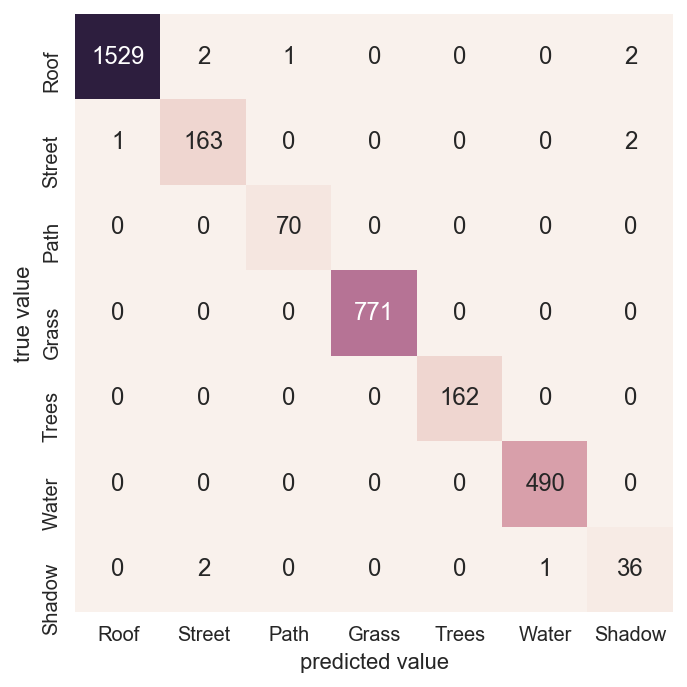

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_model = model.predict(X_valid)
mat = confusion_matrix(y_valid, y_model)  

target_name = ['Roof','Street','Path','Grass','Trees','Water','Shadow']
sns.heatmap(mat, square=True, annot=True,fmt='d', cbar=False, 
            xticklabels = target_name, yticklabels = target_name )

plt.xlabel('predicted value');
plt.ylabel('true value');

得到分类结果：

(-0.5, 306.5, 1279.5, -0.5)

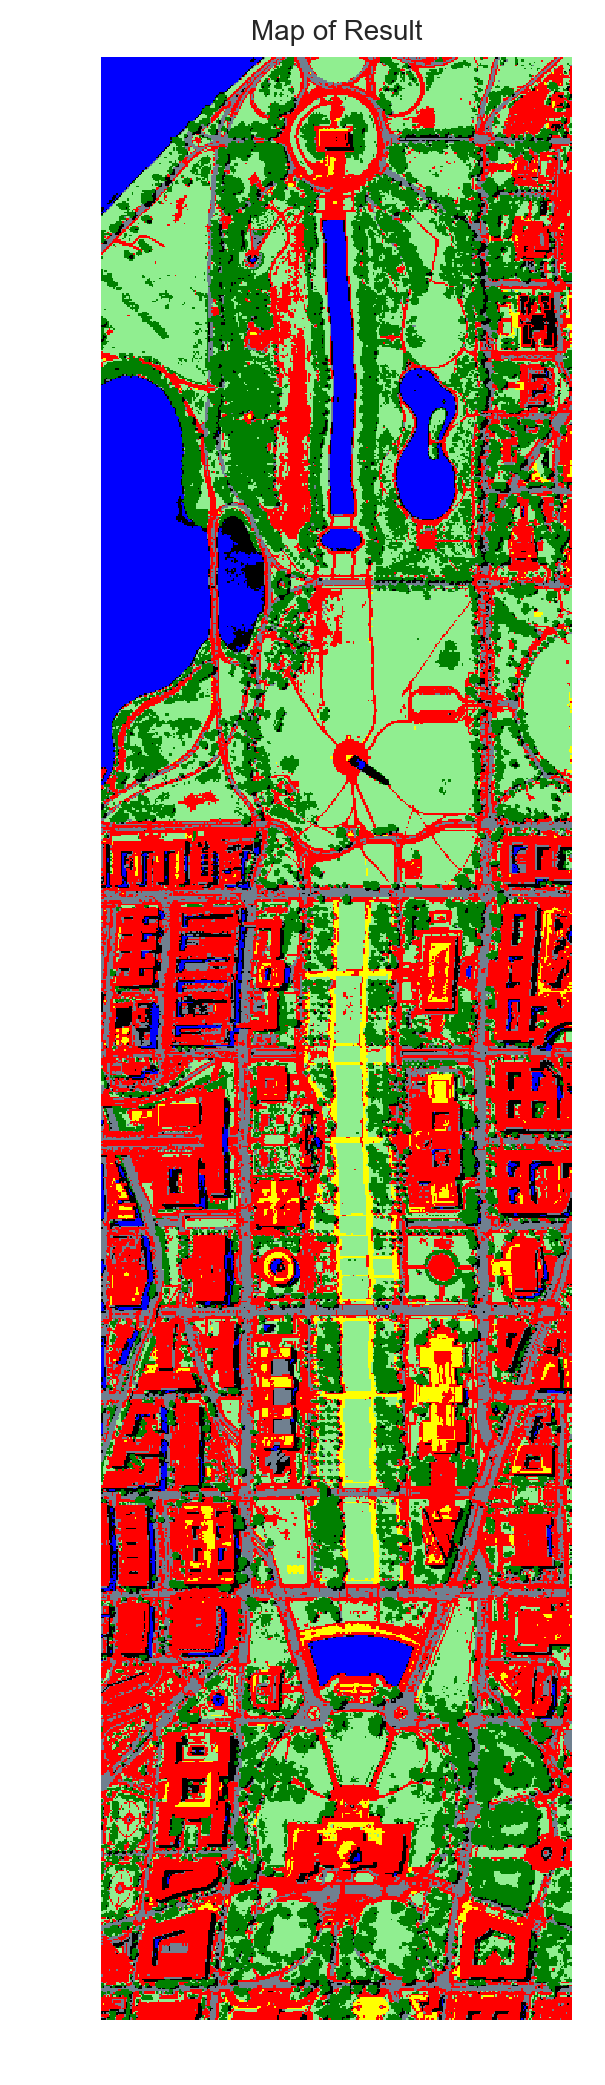

In [14]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(6,13), dpi=100)

color_name = ['Red','SlateGray','Yellow','LightGreen','Green','BLue','Black' ]
color_map = ListedColormap(color_name)

Y = model.predict(X); 
Y = np.int32(Y.reshape(num_rows,num_colomns))

plt.imshow(Y, cmap=color_map)
plt.title('Map of Result',fontsize = 10)
plt.axis('off')